<a href="https://colab.research.google.com/gist/mucsacso03/c2b6207ecb614d4c6aba11da1c176421/ner-with-bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 4.2 MB/s 
     |████████████████████████████████| 61 kB 474 kB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 
     |████████████████████████████████| 895 kB 33.4 MB/s 
     |████████████████████████████████| 596 kB 50.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.3.ner.tsv.gz
!wget http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.4.ner.tsv.gz

--2021-12-14 22:28:58--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.1.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42225789 (40M) [application/x-gzip]
Saving to: ‘huwiki.1.ner.tsv.gz’

huwiki.1.ner.tsv.gz 100%[===================>]  40.27M  7.41MB/s    in 6.2s    

2021-12-14 22:29:05 (6.47 MB/s) - ‘huwiki.1.ner.tsv.gz’ saved [42225789/42225789]

--2021-12-14 22:29:05--  http://hlt.sztaki.hu/resources/hunnerwiki/huwiki.2.ner.tsv.gz
Resolving hlt.sztaki.hu (hlt.sztaki.hu)... 195.111.2.4
Connecting to hlt.sztaki.hu (hlt.sztaki.hu)|195.111.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28227004 (27M) [application/x-gzip]
Saving to: ‘huwiki.2.ner.tsv.gz’

huwiki.2.ner.tsv.gz 100%[===================>]  26.92M  5.26MB/s    in 5.1s    

2021-12-14 22:29:11 (5.26 MB/s) - ‘huwiki.2.ner.tsv.gz’ saved [28227004/2

In [ ]:
!gunzip huwiki.1.ner.tsv.gz
!gunzip huwiki.2.ner.tsv.gz
!gunzip huwiki.3.ner.tsv.gz
!gunzip huwiki.4.ner.tsv.gz

In [ ]:
import csv
import pandas as pd
from tqdm.auto import tqdm
import tensorflow as tf
import math
from os.path import exists
sep = '\t'

csv.field_size_limit(100000000)

131072

In [ ]:
print('Reading data!')
tsv_file = open("huwiki.1.ner.tsv", encoding='utf-8')
data = tsv_file.read().split("\n")
tsv_file = open("huwiki.2.ner.tsv", encoding='utf-8')
data +=tsv_file.read().split("\n")
tsv_file = open("huwiki.3.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
tsv_file = open("huwiki.4.ner.tsv", encoding='utf-8')
data += tsv_file.read().split("\n")
print('Reading data finished!')


# Making dataset
output = open('data.csv', 'w', encoding='utf-8')
i = 0
sentence = 0
read_tsv = []
print('Splitting rows!', len(read_tsv))
for row in tqdm(data):
    if len(row)==6 and row[0]=='"':
      print(row)
    else:
      read_tsv.append(row.split(sep))
print('Splitting rows finished!', len(read_tsv))

Reading data!
Reading data finished!
Splitting rows! 0


  0%|          | 0/20408553 [00:00<?, ?it/s]

Splitting rows finished! 20408553


In [ ]:
import os
print('Making output data!')
out = []
out_sentences = []
os.makedirs('./sentences', exist_ok=True)
file_count = 1
for row in tqdm(read_tsv):

    if len(row) == 6:
        output.write(str(i) + sep+sep+sep
                      + str(sentence) + sep+sep+sep
                      + row[0] + sep+sep+sep
                      + row[5] + '\n')
        i += 1
        out.append(row[0])
    elif len(row) == 1:
        sentence += 1
        out_sentences.append(' '.join(out))
        out = []
        if(sentence % 5000 == 0):
          with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
           fp.write('\n'.join(out_sentences))
           out_sentences = []
           file_count += 1

with open(f'./sentences/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(out_sentences))
out_sentences = []
print('Making output data finished!', i, len(read_tsv))
output.close()
read_tsv = []

Making output data!


  0%|          | 0/20408553 [00:00<?, ?it/s]

Making output data finished! 19108597 20408553


In [ ]:
data = pd.read_csv("data.csv", sep=sep+sep+sep, header=None, engine='python', encoding="UTF-8")

In [ ]:
  data.rename(columns = {data.columns[0]: 'Index'},  inplace=True)
  data.rename(columns = {data.columns[1]: 'Sentence'},  inplace=True)
  data.rename(columns = {data.columns[2]: 'Word'},  inplace=True)
  data.rename(columns = {data.columns[3]: 'Tag'},  inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


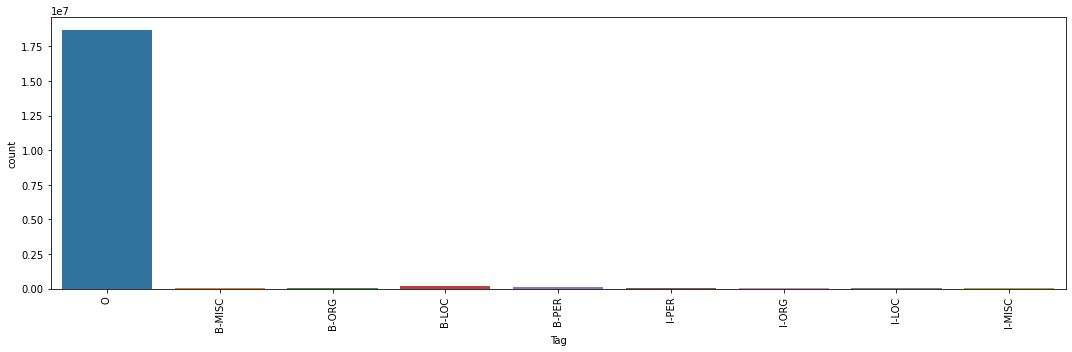

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
row_count = data.shape[0]
data = data[data.Tag != 'O']
tag_list=data.Tag.unique()
print(tag_list)
label_map = {label: i for i, label in enumerate(tag_list)}

num_labels = len(tag_list)
num_labels

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data.loc[data['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Transforming data

In [ ]:
data = []

In [ ]:
agg_func = lambda s: [ [w,t] for w,t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]

In [ ]:
from transformers import (
    TF2_WEIGHTS_NAME,
    BertConfig,
    BertTokenizer,
    TFBertForTokenClassification,
    create_optimizer)

In [ ]:
MODEL_CLASSES = {"bert": (BertConfig, TFBertForTokenClassification, BertTokenizer)}

In [ ]:
config_class, model_class, tokenizer_class = MODEL_CLASSES['bert']

In [ ]:
BERT_MODEL="bert-base-cased"

In [ ]:
config = config_class.from_pretrained(BERT_MODEL,num_labels=num_labels)

In [ ]:
tokenizer = tokenizer_class.from_pretrained(BERT_MODEL,do_lower_case=False)

In [ ]:
def isNaN(string):
    return string != string

In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_seq_length =128
pad_token_label_id = 0
def convert_to_input(sentences,tags):
  input_id_list,attention_mask_list,token_type_id_list=[],[],[]
  label_id_list=[]
  
  for x,y in tqdm(zip(sentences,tags),total=len(tags)):
    try:
      tokens = []
      label_ids = []

      for word, label in zip(x, y):
        if(isNaN(word)):
          word = 'nan'
        word_tokens = tokenizer.tokenize(word)
        tokens.extend(word_tokens)
        label_ids.extend([label_map[label]] + [pad_token_label_id] * (len(word_tokens) - 1))

    
      special_tokens_count =  2
      if len(tokens) > max_seq_length - special_tokens_count:
        tokens = tokens[: (max_seq_length - special_tokens_count)]
        label_ids = label_ids[: (max_seq_length - special_tokens_count)]

      label_ids = [pad_token_label_id]+label_ids+[pad_token_label_id]
      inputs = tokenizer.encode_plus(tokens,add_special_tokens=True, max_length=max_seq_length, truncation=True,is_split_into_words=True)

      input_ids, token_type_ids = inputs["input_ids"], inputs["token_type_ids"]
      attention_masks = [1] * len(input_ids)

      attention_mask_list.append(attention_masks)
      input_id_list.append(input_ids)
      token_type_id_list.append(token_type_ids)

      label_id_list.append(label_ids)
    except TypeError as e:
      print(x)
  return input_id_list,token_type_id_list,attention_mask_list,label_id_list


In [ ]:
def example_to_features(input_ids,attention_masks,token_type_ids,y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids},y

In [ ]:
def transform_data(data):
  nb_samples = len(data)
  valid_split = 0.2
  test_split = 0.1

  X_train = data[0:int(nb_samples*(1-valid_split-test_split))]
  X_valid = data[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]

  print('Data len',len(data))
  print('Train set len',len(X_train))
  print('Validation set len',len(X_valid))
  data = []
  print("Grouping sentences and tags together... ")
  x_train_grouped = X_train.groupby("Sentence").apply(agg_func)
  x_val_grouped = X_valid.groupby("Sentence").apply(agg_func)
  #x_test_grouped = X_test.groupby("Sentence").apply(agg_func)

  x_train_sentences = [[s[0] for s in sent] for sent in x_train_grouped.values]
  x_val_sentences = [[s[0] for s in sent] for sent in x_val_grouped.values]
  #x_test_sentences = [[s[0] for s in sent] for sent in x_test_grouped.values]

  x_train_tags = [[t[1] for t in tag] for tag in x_train_grouped.values]
  x_val_tags = [[t[1] for t in tag] for tag in x_val_grouped.values]
  #x_test_tags = [[t[1] for t in tag] for tag in x_test_grouped.values]
  X_train = []
  X_valid = []

  print("Convering sentences and tags to input: ")
  input_ids_train,token_ids_train,attention_masks_train,label_ids_train=convert_to_input(x_train_sentences,x_train_tags)
  input_ids_val,token_ids_val,attention_masks_val,label_ids_val=convert_to_input(x_val_sentences,x_val_tags)

  print("Padding inputs... ")
  input_ids_train = pad_sequences(input_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  token_ids_train = pad_sequences(token_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  attention_masks_train = pad_sequences(attention_masks_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  label_ids_train = pad_sequences(label_ids_train,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

  input_ids_val = pad_sequences(input_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  token_ids_val = pad_sequences(token_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  attention_masks_val = pad_sequences(attention_masks_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")
  label_ids_val = pad_sequences(label_ids_val,maxlen=max_seq_length,dtype="long",truncating="post",padding="post")

  print("Creating datasets... ")
  train_ds = tf.data.Dataset.from_tensor_slices((input_ids_train,attention_masks_train,token_ids_train,label_ids_train)).map(example_to_features).batch(32)

  val_ds = tf.data.Dataset.from_tensor_slices((input_ids_val,attention_masks_val,token_ids_val,label_ids_val)).map(example_to_features).batch(32)

  return train_ds, val_ds

# Training

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
model = model_class.from_pretrained(
                BERT_MODEL,
                from_pt=bool(".bin" in BERT_MODEL),
                config=config)
  model.summary()

In [ ]:
rows = 5000000;
for x in range(math.ceil(row_count/rows)):
  print("Iteration: ",x+1,"/",math.ceil(row_count/rows))
  data = pd.read_csv("data.csv", sep=sep+sep+sep, header=None, engine='python', encoding="UTF-8", nrows=rows,skiprows=rows*x)
  data.rename(columns = {data.columns[0]: 'Index'},  inplace=True)
  data.rename(columns = {data.columns[1]: 'Sentence'},  inplace=True)
  data.rename(columns = {data.columns[2]: 'Word'},  inplace=True)
  data.rename(columns = {data.columns[3]: 'Tag'},  inplace=True)

  data = data[data.Tag != 'O']

  print(data)

  if(x != 0):
    model = model_class.from_pretrained('bert-model')

  model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

  train_ds, val_ds = transform_data(data)
  print("Staring training: ")
  model.fit(train_ds, epochs=1, validation_data=val_ds)
  model.save_pretrained('bert-model')
  tf.keras.backend.clear_session()

In [ ]:
from transformers import TFBertForTokenClassification
from transformers import pipeline

model = TFBertForTokenClassification.from_pretrained("bert-model")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "Egyesült"

ner_results = nlp(example)
ner_results

# Testing

In [ ]:
import math
test_data = []
for x in range(math.ceil(row_count/rows)):
  print("Iteration: ",x+1,"/",math.ceil(row_count/rows))
  data = pd.read_csv("data.csv", sep=sep+sep+sep, header=None, engine='python', encoding="UTF-8", nrows=rows,skiprows=rows*x)
  data.rename(columns = {data.columns[0]: 'Index'},  inplace=True)
  data.rename(columns = {data.columns[1]: 'Sentence'},  inplace=True)
  data.rename(columns = {data.columns[2]: 'Word'},  inplace=True)
  data.rename(columns = {data.columns[3]: 'Tag'},  inplace=True)

  data = data[data.Tag != 'O']
  #data = data[data.Tag != 'NaN']

  nb_samples = len(data)
  valid_split = 0.2
  test_split = 0.1
  if(x == 0):
    test_data = data[int(nb_samples*(1-test_split)):]
  else:
    test_data.append(data[int(nb_samples*(1-test_split)):])

print(test_data)

In [ ]:
print(test_data.iloc[[42]])

In [ ]:
import numpy as np
all = test_data.shape[0]
good = 0
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
for x in tqdm(range(test_data.shape[0])):
  #print(x,'/',all)
  text = test_data.iat[x,2]
  ner_results = nlp(text)
  if(ner_results[0]['entity'][-1] == str(np.where(tag_list == test_data.iat[x,3])[0][0])):
    good+=1
print('Accuracy: ',good/all)